# Retail Sales Forecast Project
### Data Preprocessing

In [1]:

# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [ ]:
df_store = pd.read_csv("stores_data_set.csv")
df_store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [3]:
df_store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
# load sales dataset
df_sales = pd.read_csv("sales_data_set.csv")
df_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [5]:
df_sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
# load features dataset
df_feature = pd.read_csv("Features_data_set.csv")
df_feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
df_feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [8]:
# combine store and sales dataframe into single dataframe based on 'store' column
df1 = pd.merge(df_sales, df_store, on='Store', how='inner')
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,B,118221
421566,45,98,05/10/2012,628.10,False,B,118221
421567,45,98,12/10/2012,1061.02,False,B,118221
421568,45,98,19/10/2012,760.01,False,B,118221


In [9]:
# combine store and feature dataframe into single datarame based on 'store' column
df2 = pd.merge(df_store, df_feature, on='Store', how='inner')
df2

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [10]:
# create unique column (diff) for the combination of store and date
df1['diff'] = df1['Store'].astype(str) + '-' + df1['Date']
df2['diff'] = df2['Store'].astype(str) + '-' + df2['Date']

In [11]:
df1.tail(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff
421565,45,98,28/09/2012,508.37,False,B,118221,45-28/09/2012
421566,45,98,05/10/2012,628.10,False,B,118221,45-05/10/2012
421567,45,98,12/10/2012,1061.02,False,B,118221,45-12/10/2012
421568,45,98,19/10/2012,760.01,False,B,118221,45-19/10/2012
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012


In [12]:
df2.tail(3)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
8189,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [13]:
# make list with diff column for df1
df1_list = df1['diff'].to_list()

In [14]:
# filter 2010 to 2012-oct data from df2 based on df1_list
df2_inlist = df2[df2['diff'].isin(df1_list)]
df2_inlist.reset_index(drop=True, inplace=True)
df2_inlist.tail(5)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
6430,45,B,118221,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,45-28/09/2012
6431,45,B,118221,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,45-05/10/2012
6432,45,B,118221,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,45-12/10/2012
6433,45,B,118221,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,45-19/10/2012
6434,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,45-26/10/2012


In [15]:
# anther filter for 2012-oct to 2013 data from df2 not in df1_list (~)
df2_notinlist = df2[~df2['diff'].isin(df1_list)]
df2_notinlist.reset_index(drop=True, inplace=True)
df2_notinlist.tail(5)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
1750,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
1751,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
1752,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
1753,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
1754,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [16]:
df2.shape, df2_inlist.shape, df2_notinlist.shape



((8190, 15), (6435, 15), (1755, 15))

In [17]:
# check unique columns
df2['diff'].nunique(), df2_inlist['diff'].nunique(), df2_notinlist['diff'].nunique()

(8190, 6435, 1755)

In [18]:
# merge df1 and df2(2010 to 2012-oct) data based on 'diff' column
# 'inner' - merge columns based on exact 'diff' in both dataframes

df3 = pd.merge(df1, df2_inlist, on='diff', how='inner')
df3.tail()

,Store_x,Dept,Date_x,Weekly_Sales,IsHoliday_x,Type_x,Size_x,diff,Store_y,Type_y,Size_y,Date_y,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421565,45,93,26/10/2012,2487.80,False,B,118221,45-26/10/2012,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,94,26/10/2012,5203.31,False,B,118221,45-26/10/2012,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,95,26/10/2012,56017.47,False,B,118221,45-26/10/2012,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,97,26/10/2012,6817.48,False,B,118221,45-26/10/2012,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [19]:
# drop the duplicate columns and rename it
df3.drop(columns=['Store_y','Type_y','Size_y','Date_y','IsHoliday_y'], inplace=True)
df3.rename(columns={'Store_x':'Store', 'Date_x':'Date', 'IsHoliday_x':'IsHoliday', 'Type_x':'Type', 'Size_x':'Size'}, inplace=True)

In [20]:
# filter 'store' and 'dept' column from sales dataframe
s = df_sales[['Store','Dept']]
s

,Store,Dept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
421565,45,98
421566,45,98
421567,45,98
421568,45,98


In [21]:
# remove duplicates from the combination of 'store' and 'dept'

s.drop_duplicates(subset=['Store', 'Dept'], inplace=True)
s.reset_index(drop=True, inplace=True)
s

,Store,Dept
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
3326,45,94
3327,45,95
3328,45,96
3329,45,97


In [22]:
# outer - it create rows for all combinations like (store,dept,date,etc.,)

df4 = pd.merge(s, df2_notinlist, on='Store', how='outer')
df4.tail()

,Store,Dept,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
129904,45,98,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
129905,45,98,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
129906,45,98,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
129907,45,98,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
129908,45,98,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [23]:
# concatinate both dataframes into single dataframe (2010 to 2013)

df5 = pd.concat([df3, df4])
df5.reset_index(drop=True, inplace=True)
df5.tail()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,45,98,28/06/2013,NaN,False,B,118221,45-28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
551475,45,98,05/07/2013,NaN,False,B,118221,45-05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
551476,45,98,12/07/2013,NaN,False,B,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
551477,45,98,19/07/2013,NaN,False,B,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN
551478,45,98,26/07/2013,NaN,False,B,118221,45-26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [24]:
# Datatype conversion using pandas
df5['Date'] = df5['Date'].apply(lambda x: x.replace('/','-'))
df5['Date'] = pd.to_datetime(df5['Date'], format='%d-%m-%Y', errors='coerce')

# encoding for catagorical features into numerical
df5['IsHoliday'] = df5['IsHoliday'].map({True:1, False:0})
df5['Type'] = df5['Type'].map({'A':1, 'B':2, 'C':3})

df5.tail(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551476,45,98,2013-07-12,NaN,0,2,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
551477,45,98,2013-07-19,NaN,0,2,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN
551478,45,98,2013-07-26,NaN,0,2,118221,45-26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [25]:
# drop 'diff' column and sort the dataframe in ascending order

df5.drop(columns=['diff'], inplace=True)

df5 = df5.sort_values(by=['Date','Store','Dept'])
df5.reset_index(drop=True, inplace=True)

df5.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,45,94,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,45,95,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,45,96,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,45,97,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,45,98,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [26]:
# make Date feature into --> Day,Month,Year new features and drop Date column

df5['Day'] = df5['Date'].dt.day
df5['Month'] = df5['Date'].dt.month
df5['Year'] = df5['Date'].dt.year
df5.drop(columns=['Date'], inplace=True)
df5

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,1,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
1,1,2,50605.27,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
2,1,3,13740.12,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
3,1,4,39954.04,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
4,1,5,32229.38,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551475,45,95,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551476,45,96,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551477,45,97,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013


In [27]:
df5 = df5[['Day','Month','Year','Store','Dept','Type','Weekly_Sales','Size','IsHoliday','Temperature',
           'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']]
df5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [28]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.000000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.000000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.000000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.000000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.000000,2.000000,3.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.030000,20205.852500,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.000000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.940000,73.160000,101.950000


In [29]:
# check negative weekly_sales count
df5[df5['Weekly_Sales']<=0]

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
389,5,2,2010,6,47,1,-59.00,202505,0,40.43,2.572,NaN,NaN,NaN,NaN,NaN,212.622352,7.259
601,5,2,2010,9,49,2,-15.00,125833,0,38.01,2.572,NaN,NaN,NaN,NaN,NaN,214.655459,6.415
714,5,2,2010,11,19,1,0.00,207499,0,46.04,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368
1039,5,2,2010,15,80,2,-0.04,123737,0,19.83,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.350
1345,5,2,2010,20,19,1,0.00,203742,0,25.92,2.784,NaN,NaN,NaN,NaN,NaN,204.247194,8.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419896,26,10,2012,19,47,1,-18.00,203819,0,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992
419943,26,10,2012,20,19,1,-3.97,203742,0,60.04,3.882,10813.19,22.33,102.91,867.39,1671.76,216.151590,7.293
420601,26,10,2012,29,80,2,-178.15,93638,0,57.58,3.917,5581.80,2.98,NaN,398.23,396.11,138.728161,9.151
420972,26,10,2012,35,80,2,-16.51,103681,0,58.99,3.882,6221.06,42.48,103.00,273.90,996.79,142.762411,8.665


In [30]:
# negative weekly_sales value convert to null value

df5['Weekly_Sales'] = df5['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x)
df5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [31]:
# check null values of all features
df5.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64

In [32]:
# create 'markdown' column for --> all markdowns are null means 0, otherwise 1 (any one markdown have value)

df5['markdown'] = df5[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].notnull().any(axis=1).astype(int)
df5

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1


In [33]:
# check weekly_sales average --> holiday(1) and non-holiday(0)
df5.groupby('markdown')['Weekly_Sales'].mean()

markdown
0    15922.137810
1    16231.116041
Name: Weekly_Sales, dtype: float64

## Univariate Analysis
Analyze individual features using histograms, boxplots, and descriptive statistics.

Univariate Analysis - Descriptive Statistics:
                 count           mean           std        min           25%  \
Day           551479.0      15.653488      8.776044      1.000      8.000000   
Month         551479.0       6.277180      3.340134      1.000      3.000000   
Year          551479.0    2011.392758      1.054086   2010.000   2010.000000   
Store         551479.0      22.270485     12.796872      1.000     11.000000   
Dept          551479.0      44.603013     30.416079      1.000     19.000000   
Type          551479.0       1.594791      0.669624      1.000      1.000000   
Weekly_Sales  420212.0   16033.114591  22729.492116      0.010   2120.130000   
Size          551479.0  136073.691863  61207.331445  34875.000  93638.000000   
IsHoliday     551479.0       0.071905      0.258330      0.000      0.000000   
Temperature   551479.0      58.703624     18.685408     -7.290     45.160000   
Fuel_Price    551479.0       3.413010      0.427725      2.472      3.0500

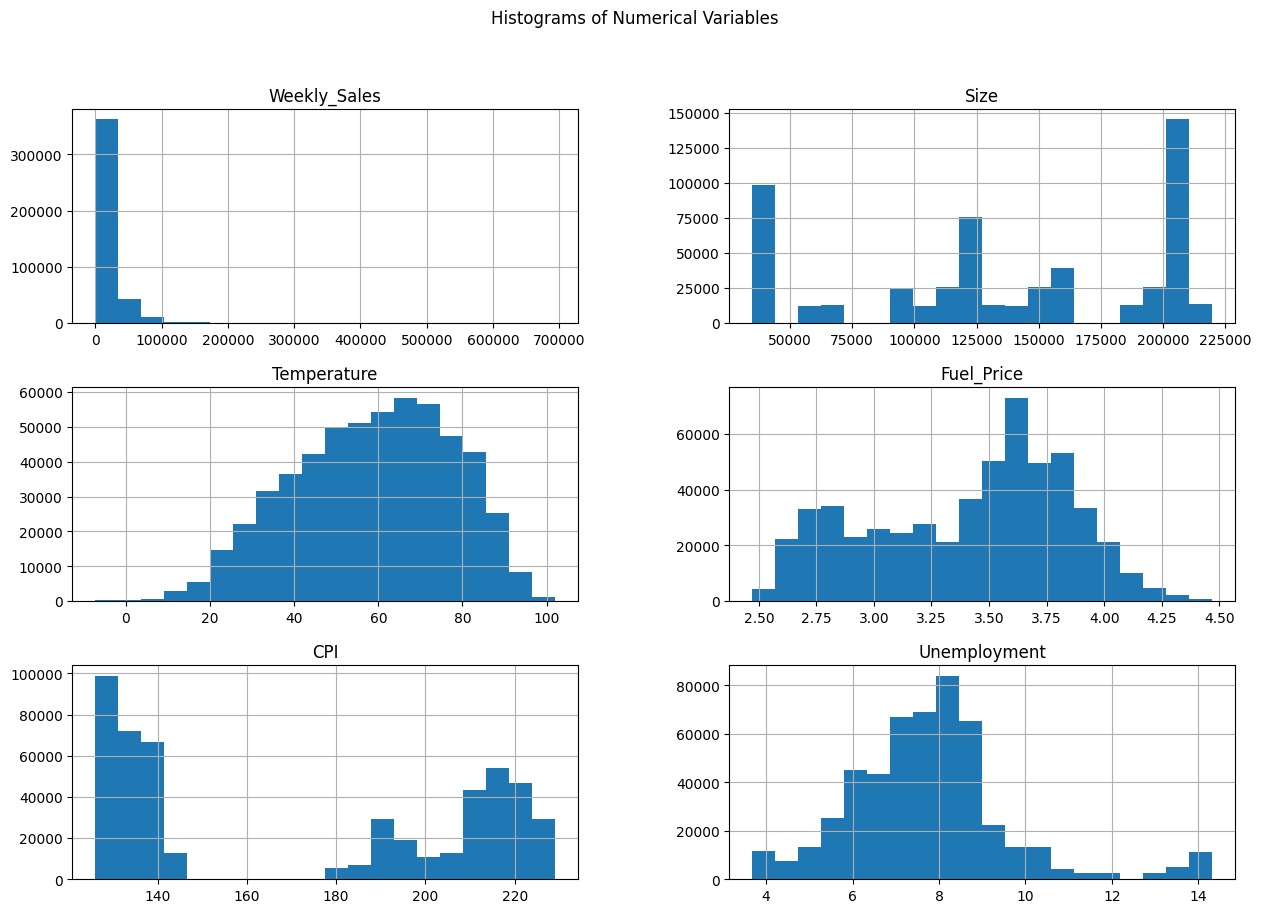

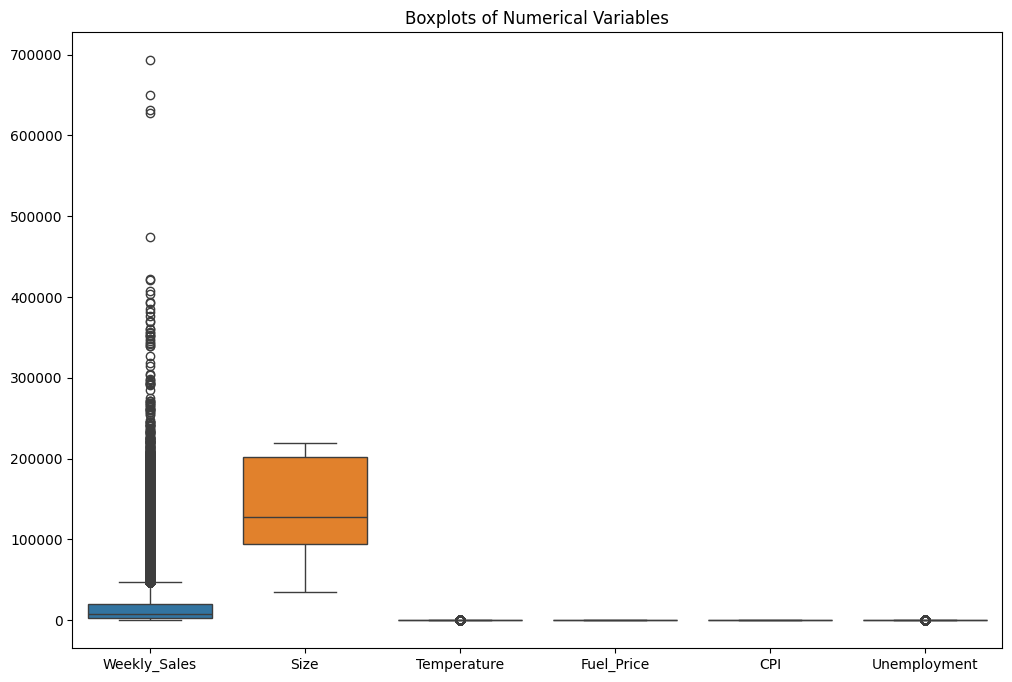

In [34]:

# Univariate Analysis
print("Univariate Analysis - Descriptive Statistics:")
print(df5.describe().T)

# Histograms for Numerical Variables
df5[['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Boxplots to Identify Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df5[['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.title('Boxplots of Numerical Variables')
plt.show()


## Bivariate Analysis
Explore relationships between features using correlation matrices, heatmaps, and scatter plots.

Bivariate Analysis - Correlation Matrix:


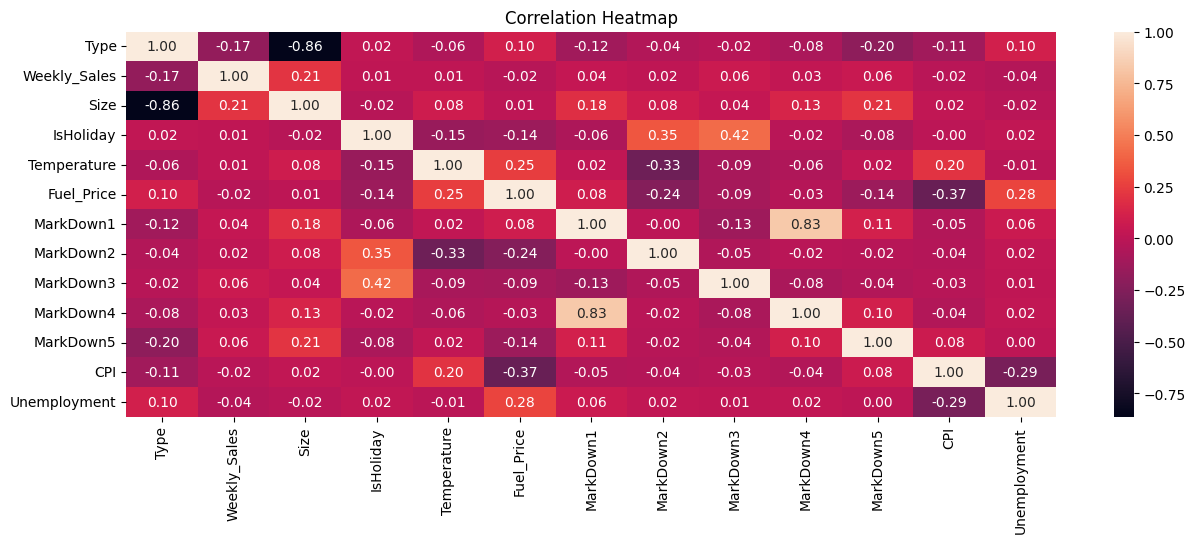

In [37]:

# Bivariate Analysis
print("Bivariate Analysis - Correlation Matrix:")
# Calculate the correlation matrix
df5_corr = df5.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','markdown']).dropna().corr()

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(df5_corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


